# 0. Getting The Dataset From Kaggle

In [1]:
! pip install -q kaggle

### For google collab

In [2]:
# from google.colab import files
# files.upload() # choose the kaggle.json file 

In [3]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/home/mikeyy/.kaggle’: File exists


**Make directory named kaggle and copy kaggle.json file there.**

In [4]:
! cp kaggle.json ~/.kaggle/

**Change the permissions of the file.**

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

**check if everything's okay**

In [6]:
#  ! kaggle datasets list

In [7]:
# !kaggle datasets download -d jsphyg/weather-dataset-rattle-package

In [8]:
# !unzip weather-dataset-rattle-package.zip

# First Glance Into The Data

## Necessary Imports

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

why I Delete Date column?, well it is needed in our model after further analysis

In [10]:
# df = pd.read_csv('weatherAUS.csv', index_col="Date", parse_dates=True)
df = pd.read_csv('weatherAUS.csv')
# df['Date'] = pd.to_datetime(df['Date'])
# df = df.set_index('Date')
# df.head()
# df.columns = df.columns.str.lower()
df = df.drop("Date", axis=1)

In [11]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [12]:
df.index.min(), df.index.max()

(0, 145459)

# EDA
- Exploratory Data Analysis(EDA) is a technique used to analyze, visualize, investigate, interpret, discover and summarize data.
- It helps Data Scientists to extract trends, patterns, and relationships in data.


---


* Check missing values
* Look at the target variable (RainTomorrow)
* Look at numerical and categorical variables

In [13]:
df.shape

(145460, 22)

In [14]:
df.info()
# df.isna().sum() # to check the amount of null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-null

We can see that features with values that are less than 145460 contains NULL values that means except for  Date, Location columns, every column has missing values

In [15]:
df.describe(exclude="object").T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [16]:
df.describe(include="object")

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,135134,134894,141232,142199,142193
unique,49,16,16,16,2,2
top,Canberra,W,N,SE,No,No
freq,3436,9915,11758,10838,110319,110316


**Categorical features**

In [17]:
cat_cols = list(df.dtypes[df.dtypes == "object"].index)
cat_cols

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

**Numerical Features**

In [18]:
num_cols = list(df.dtypes[df.dtypes != "object"].index)
num_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [19]:
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [20]:
len(df['RainTomorrow'].unique())

3

### Cardinality Check
  **The number of unique values in each categorical feature is known as cardinality.**
  > if we have a high cardinality data it will result in higher dimension when that feature is encoded so we must deal with that type of feature. Some ways are:
  1. Feature Engineering
  2. Drop the feature if it doesn't add value to the model 

In [21]:
for feat in cat_cols:
    unique_values = len(df[feat].unique())
    print(f"cardinality of {feat} is {unique_values}")

cardinality of Location is 49
cardinality of WindGustDir is 17
cardinality of WindDir9am is 17
cardinality of WindDir3pm is 17
cardinality of RainToday is 3
cardinality of RainTomorrow is 3


<AxesSubplot:>

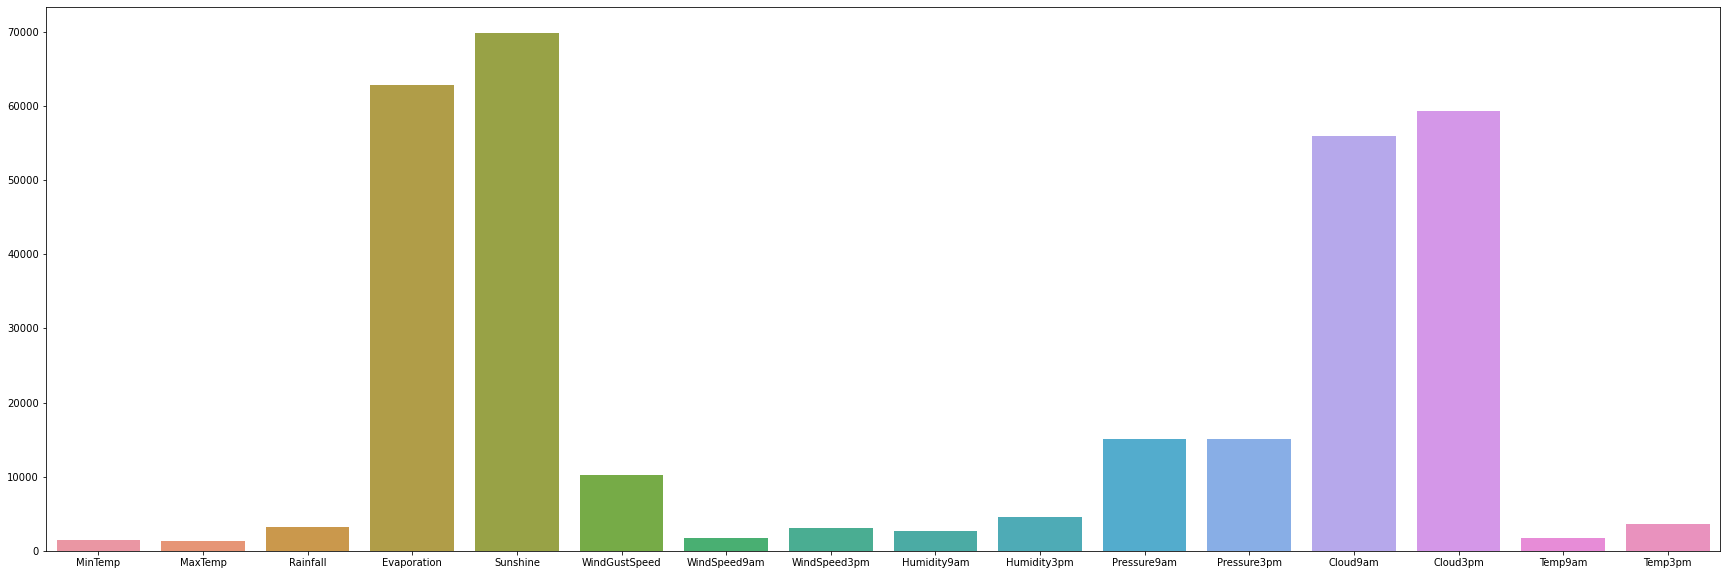

In [22]:
null_values = df[num_cols].isnull().sum()
plt.figure(figsize = (30,10))
sns.barplot(x=num_cols,y= null_values)

<AxesSubplot:>

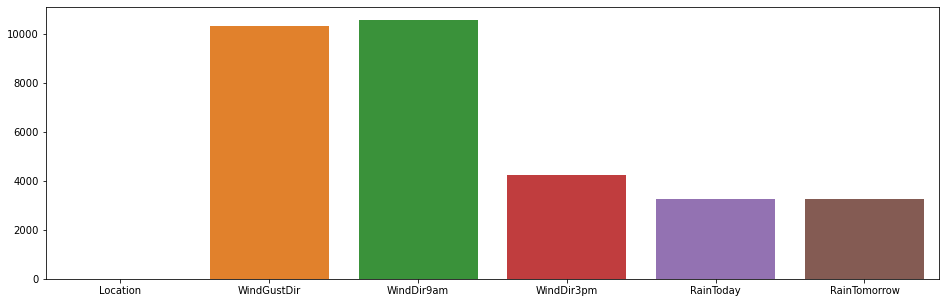

In [23]:
null_values = df[cat_cols].isnull().sum()
plt.figure(figsize = (16,5))
sns.barplot(x=cat_cols,y= null_values)

## Dealing With The Missing Values
1. We use mode value for the categorical features
2. We use mean or median for the numerical features
  > Mean are sensitive to outliers whereas median are not
  - For mean we must deal with the outliers.

In [24]:
df['Location'].value_counts().head()

Canberra    3436
Sydney      3344
Darwin      3193
Hobart      3193
Adelaide    3193
Name: Location, dtype: int64

In [25]:
df['Location'].mode()[0]

'Canberra'

In [26]:
data = df.copy()

In [27]:
x = data['Location'].fillna(data['Location'].mode()[0])
x.isna().sum(), data['Location'].isna().sum()

(0, 0)

In [28]:
# data.fillna?

In [29]:
for col in cat_cols:
    mode_val = data[col].mode()[0] 
    data[col].fillna(mode_val, inplace=True)

In [30]:
cat_cols.remove("RainTomorrow")
cat_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

<AxesSubplot:>

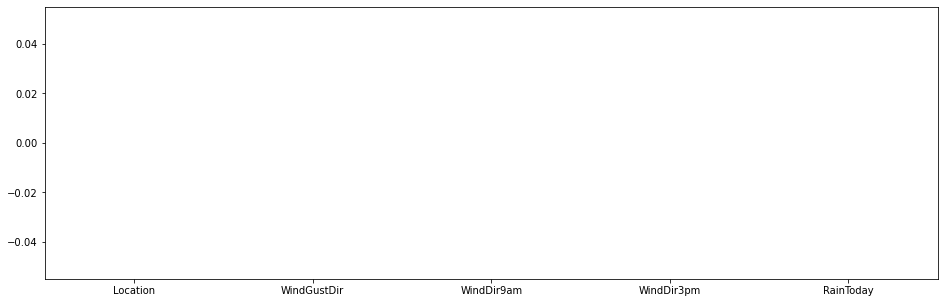

In [31]:
null_values = data[cat_cols].isnull().sum()
plt.figure(figsize = (16,5))
sns.barplot(x=cat_cols,y= null_values)

In [32]:
data[num_cols[0]].mean(), data[num_cols[0]].median()

(12.19403438096871, 12.0)

<AxesSubplot:xlabel='MinTemp'>

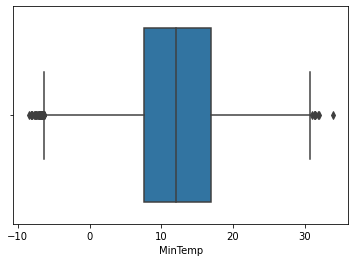

In [33]:
sns.boxplot(x=data[num_cols[0]])

In [34]:
for col in num_cols:
    mode_val = data[col].median()
    data[col].fillna(mode_val, inplace=True)

<AxesSubplot:>

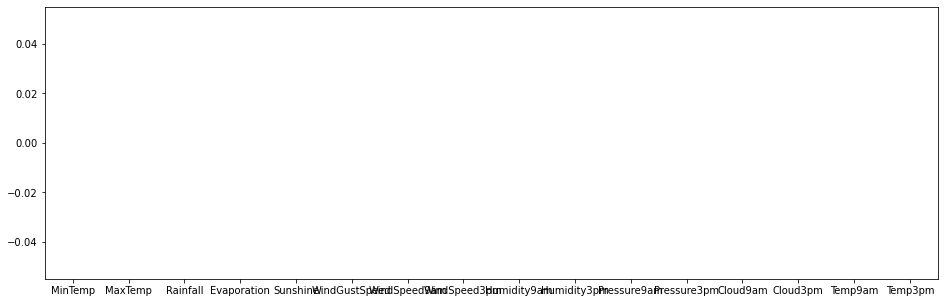

In [35]:
null_values = data[num_cols].isnull().sum()
plt.figure(figsize = (16,5))
sns.barplot(x=num_cols,y= null_values)

## Looking at the Target Variable

<AxesSubplot:>

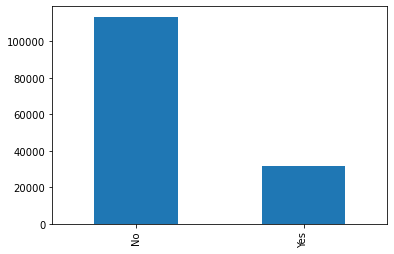

In [36]:
data.RainTomorrow.value_counts().plot(kind='bar')

In [37]:
data['RainToday'].replace({'No':0, 'Yes': 1}, inplace = True)

data['RainTomorrow'].replace({'No':0, 'Yes': 1}, inplace = True)

In [38]:
from sklearn.model_selection import train_test_split

data_full_train, data_test = train_test_split(data, test_size=0.2, random_state=1)
data_train, data_val = train_test_split(data_full_train, test_size=0.25, random_state=1)

In [39]:
data_full_train = data_full_train.reset_index(drop=True)
data_train = data_train.reset_index(drop=True)
data_val = data_val.reset_index(drop=True)
data_test = data_test.reset_index(drop=True)

In [40]:
data_test.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [41]:
y_train = data_train['RainTomorrow'] 
y_val = data_val['RainTomorrow'] 
y_test = data_test['RainTomorrow']

del data_train['RainTomorrow']
del data_val['RainTomorrow']
del data_test['RainTomorrow']

In [42]:
y_train

0        0
1        0
2        0
3        1
4        0
        ..
87271    0
87272    0
87273    1
87274    0
87275    0
Name: RainTomorrow, Length: 87276, dtype: int64

In [43]:
from sklearn.feature_extraction import DictVectorizer

In [44]:
train_dicts = data_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [45]:
val_dicts = data_val.to_dict(orient="records")
X_val = dv.transform(val_dicts)

<AxesSubplot:>

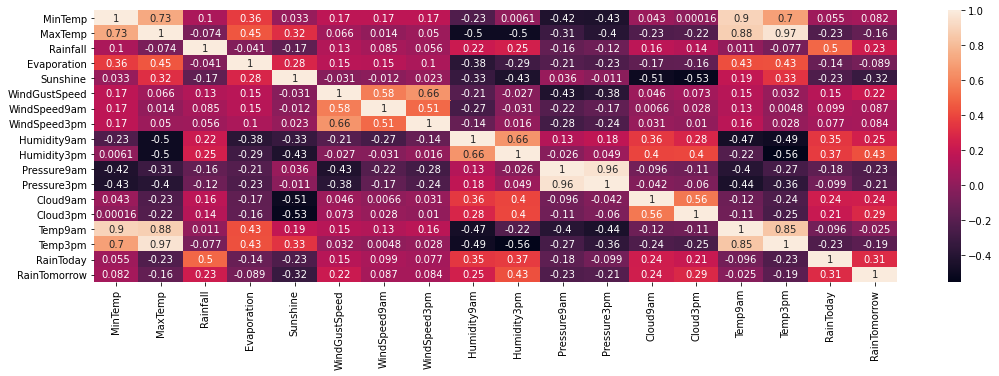

In [46]:
cor = data.corr()
plt.figure(figsize=(18,5))
sns.heatmap(cor, annot=True)

# Feature Engineering

In [47]:
from sklearn.metrics import roc_auc_score

In [48]:
for num in num_cols:
  print(num, round(roc_auc_score(data["RainTomorrow"], data[num]),3))

MinTemp 0.552
MaxTemp 0.391
Rainfall 0.692
Evaporation 0.435
Sunshine 0.303
WindGustSpeed 0.639
WindSpeed9am 0.554
WindSpeed3pm 0.551
Humidity9am 0.682
Humidity3pm 0.791
Pressure9am 0.348
Pressure3pm 0.361
Cloud9am 0.666
Cloud3pm 0.696
Temp9am 0.479
Temp3pm 0.369


In [49]:
from sklearn.ensemble import ExtraTreesRegressor
etr_model = ExtraTreesRegressor()
etr_model.fit(X_train,y_train)
# etr_model.feature_importances_

ExtraTreesRegressor()

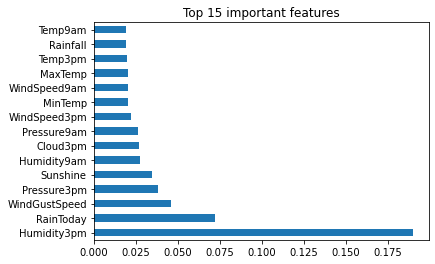

In [50]:
feat_importances = pd.Series(etr_model.feature_importances_, index=dv.get_feature_names())
feat_importances.nlargest(15).plot(kind='barh')
plt.title("Top 15 important features")
plt.show()

## Feature Scaling
* Feature Scaling is a technique used to scale, normalize, standardize data in range(0,1). 
* When each column of a dataset has distinct values, then it helps to scale data of each column to a common level. 

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [52]:
X_val = scaler.transform(X_val)

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:

# Training
def train(df_train, y_train, C=1.0):
    dicts = df_train[cat_cols+ num_cols].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

def predict(df, dv, model):
    dicts = df[cat_cols+num_cols].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:,1]

    return y_pred

In [55]:
model1 = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
# solver='lbfgs' is the default solver in newer version of sklearn
# for older versions, you need to specify it explicitly
model1.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [56]:
y_pred_proba = model1.predict_proba(X_val)[:,1]
y_pred_proba

array([0.02968134, 0.00761175, 0.07876674, ..., 0.15280887, 0.26384442,
       0.16886306])

In [57]:
y_val

0        0
1        0
2        0
3        0
4        0
        ..
29087    1
29088    1
29089    0
29090    0
29091    0
Name: RainTomorrow, Length: 29092, dtype: int64

In [58]:
y_pred = (y_pred_proba >= 0.5).astype(int)

In [59]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [60]:
from sklearn.metrics import accuracy_score
print("Accuracy Score: {}".format(accuracy_score(y_val,y_pred)))

Accuracy Score: 0.849752509280902


In [61]:
model1.score(X_train, y_train)

0.8483202713231587

In [62]:
model1.score(X_val, y_val)

0.849752509280902

In [63]:
from sklearn.model_selection import KFold

In [64]:
C=1.0
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [65]:
data_train.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

In [66]:
data_train.shape, y_train.shape

((87276, 21), (87276,))

In [68]:
data_full_train.shape

(116368, 22)

In [71]:
import warnings

def kfold_eval(df_full_train):    
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        scores = []
        fold= 0

        for train_idx, val_idx in kfold.split(df_full_train):
            df_train = df_full_train.iloc[train_idx]
            df_val = df_full_train.iloc[val_idx]

            y_train = df_train.RainTomorrow.values
            y_val = df_val.RainTomorrow.values

            dv, model = train(df_train, y_train, C=C)
            y_pred = predict(df_val, dv, model)

            auc = roc_auc_score(y_val, y_pred)
            scores.append(auc)

            print(f'auc on fold {fold} is {auc}')
            fold = fold + 1


        print('validation results:')
        print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

kfold_eval(data_full_train)

/home/mikeyy/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


auc on fold 0 is 0.8619700639388997


/home/mikeyy/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


auc on fold 1 is 0.858321612712493


/home/mikeyy/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


auc on fold 2 is 0.8657379101774352


/home/mikeyy/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


auc on fold 3 is 0.8651564161575865


/home/mikeyy/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


auc on fold 4 is 0.8615175449731621
validation results:
C=1.0 0.863 +- 0.003


#### FOR OUR LOGITIC REGRESSION MODEL
**The Accuracy Score are almost similar so there doesn't seem to be overfitting and underfitting**

#### RandomForestRegressor

In [72]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [73]:
estimators = np.arange(10,210, step=10)
estimators

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])

**Creating the Best Model and evaluating it**

In [74]:
from sklearn import metrics 

In [75]:
def eval(y_val, y_pred):
    pass

In [76]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [77]:
thres = np.linspace(0,1,101)
thres[::10]

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [90]:
scores = []
for t in thres:
    pred_positive = (y_pred >= t)
    pred_negative = (y_pred < t)

    tp = (actual_positive & pred_positive).sum()
    tn = (actual_negative & pred_negative).sum()

    fp = (actual_negative & pred_positive).sum()
    fn = (actual_positive & pred_negative).sum()
    
    scores.append([t, tp, fp, fn ,tn])   

In [91]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
data_scores = pd.DataFrame(scores, columns=columns)

data_scores['precision'] = data_scores.tp / (data_scores.tp + data_scores.fp)
data_scores['recall'] = data_scores.tp / (data_scores.tp + data_scores.fn)

data_scores['f1_score'] = 2 * (data_scores['precision'] * data_scores['recall']) /  (data_scores['precision'] + data_scores['recall']) 

data_scores['accuracy'] = (data_scores.tp + data_scores.tn) / (data_scores.tp + data_scores.tn + data_scores.fp + data_scores.fn)


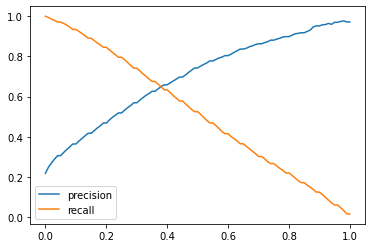

In [92]:

plt.plot(data_scores.threshold, data_scores['precision'], label='precision')
plt.plot(data_scores.threshold, data_scores['recall'], label='recall')
plt.legend() # they intersect at 0.4 threshold

In [97]:
data_scores.sort_values(['f1_score', 'accuracy'], ascending=False)[:5]

,threshold,tp,fp,fn,tn,precision,recall,f1_score,accuracy
33,0.33,4463,2898,1890,19841,0.606303,0.702503,0.650868,0.835419
35,0.35,4292,2559,2061,20180,0.626478,0.675586,0.650106,0.841193
36,0.36,4292,2559,2061,20180,0.626478,0.675586,0.650106,0.841193
37,0.37,4208,2385,2145,20354,0.638253,0.662364,0.650085,0.844287
38,0.38,4126,2220,2227,20519,0.650173,0.649457,0.649815,0.847140


TN FP <br>
FN TP

In [98]:
y_pred = (y_pred >= 0.33).astype(int)
cnf_matrix = metrics.confusion_matrix(y_val, y_pred)
cnf_matrix

array([[19841,  2898],
       [ 1890,  4463]])

### See if performance can be increased with cross validation
=> Nop, the accuracy seems pretty similar to what we previously had so cross validation didn't have that much of the effort we're hoping for

In [99]:
from sklearn.model_selection import cross_val_score

In [100]:
y_train.shape, X_train.shape

((87276,), (87276, 114))

In [101]:
scores = cross_val_score(model1, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross Validation scores: {scores}")
print(f"Average Cross Validation scores: {scores.mean()}")

Cross Validation scores: [0.8439505  0.85081638 0.84772272 0.85007161 0.84714981]
Average Cross Validation scores: 0.8479422062388527


# Let's see if Random Forrest Can Give us a better model 

In [102]:
scores = []
for n in estimators:
    rf = RandomForestRegressor(n_estimators=n,
                            n_jobs=-1,
                            random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred)) # y_true, y_pred
    print(f"for n_estimator={n} rmse={round(rmse,5)}")
    scores.append((n, rmse))

for n_estimator=10 rmse=0.34007
for n_estimator=20 rmse=0.33101
for n_estimator=30 rmse=0.32781
for n_estimator=40 rmse=0.32657
for n_estimator=50 rmse=0.32568
for n_estimator=60 rmse=0.32495
for n_estimator=70 rmse=0.32451
for n_estimator=80 rmse=0.32426
for n_estimator=90 rmse=0.32402
for n_estimator=100 rmse=0.32381
for n_estimator=110 rmse=0.32358
for n_estimator=120 rmse=0.32357
for n_estimator=130 rmse=0.32339
for n_estimator=140 rmse=0.32327
for n_estimator=150 rmse=0.32322
for n_estimator=160 rmse=0.3232
for n_estimator=170 rmse=0.3232
for n_estimator=180 rmse=0.3232
for n_estimator=190 rmse=0.32319
for n_estimator=200 rmse=0.3231


BEST RANDOMFOREST REGRESSOR

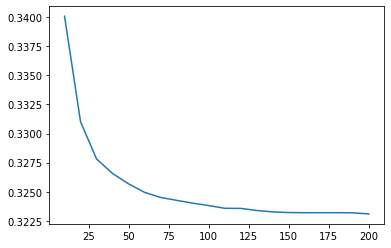

In [103]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])
plt.plot(df_scores.n_estimators, df_scores.rmse) #130 seems to be a sweet spot

In [104]:
rf = RandomForestRegressor(n_estimators=130,
                        n_jobs=-1,
                        random_state=1)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred)) # y_true, y_pred

In [105]:
y_pred = (y_pred >= 0.36).astype(int)
cnf_matrix = metrics.confusion_matrix(y_val, y_pred)
cnf_matrix

array([[20230,  2509],
       [ 2072,  4281]])

In [107]:
roc_auc_score(y_val, y_pred)

0.7817579033358564

In [108]:
scores = []
for t in thres:
    pred_positive = (y_pred >= t)
    pred_negative = (y_pred < t)

    tp = (actual_positive & pred_positive).sum()
    tn = (actual_negative & pred_negative).sum()

    fp = (actual_negative & pred_positive).sum()
    fn = (actual_positive & pred_negative).sum()
    
    scores.append([t, tp, fp, fn ,tn])   

In [109]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
data_scores = pd.DataFrame(scores, columns=columns)

data_scores['precision'] = data_scores.tp / (data_scores.tp + data_scores.fp)
data_scores['recall'] = data_scores.tp / (data_scores.tp + data_scores.fn)

data_scores['f1_score'] = 2 * (data_scores['precision'] * data_scores['recall']) /  (data_scores['precision'] + data_scores['recall']) 

data_scores['accuracy'] = (data_scores.tp + data_scores.tn) / (data_scores.tp + data_scores.tn + data_scores.fp + data_scores.fn)

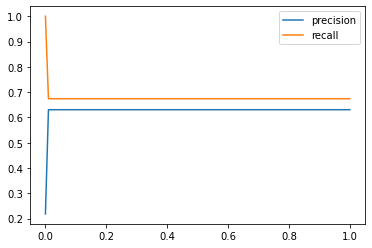

In [110]:
plt.plot(data_scores.threshold, data_scores['precision'], label='precision')
plt.plot(data_scores.threshold, data_scores['recall'], label='recall')
plt.legend() # they intersect at 0.4 threshold

In [111]:
data_scores.sort_values(['f1_score', 'accuracy'], ascending=False)[:5]

,threshold,tp,fp,fn,tn,precision,recall,f1_score,accuracy
1,0.01,4281,2509,2072,20230,0.630486,0.673855,0.651449,0.842534
2,0.02,4281,2509,2072,20230,0.630486,0.673855,0.651449,0.842534
3,0.03,4281,2509,2072,20230,0.630486,0.673855,0.651449,0.842534
4,0.04,4281,2509,2072,20230,0.630486,0.673855,0.651449,0.842534
5,0.05,4281,2509,2072,20230,0.630486,0.673855,0.651449,0.842534


# TESTING ON THE TEST DATA

In [112]:
test1 = data_test.head(1).to_dict(orient='records')
test1

[{'Location': 'Penrith',
  'MinTemp': 16.6,
  'MaxTemp': 30.5,
  'Rainfall': 16.2,
  'Evaporation': 4.8,
  'Sunshine': 8.4,
  'WindGustDir': 'NE',
  'WindGustSpeed': 31.0,
  'WindDir9am': 'E',
  'WindDir3pm': 'NE',
  'WindSpeed9am': 4.0,
  'WindSpeed3pm': 20.0,
  'Humidity9am': 73.0,
  'Humidity3pm': 45.0,
  'Pressure9am': 1017.6,
  'Pressure3pm': 1015.2,
  'Cloud9am': 5.0,
  'Cloud3pm': 5.0,
  'Temp9am': 20.3,
  'Temp3pm': 29.4,
  'RainToday': 1}]

In [113]:
y_test[0]

0

In [114]:
test1 = dv.transform(test1)
test1

array([[5.0000e+00, 5.0000e+00, 4.8000e+00, 4.5000e+01, 7.3000e+01,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0500e+01,
        1.6600e+01, 1.0152e+03, 1.0176e+03, 1.0000e+00, 1.6200e+01,
        8.4000e+00, 2.9400e+01, 2.0300e+01, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

In [115]:
test_pred_prob = model1.predict_proba(test1)[:,1]
test_pred = (test_pred_prob >= 0.36).astype(int)
test_pred[0]

0

In [116]:
y_test[0]

0

In [117]:
test_pred_prob = rf.predict(test1)
test_pred = (test_pred_prob >= 0.36).astype(int)
test_pred[0]

0

# Checking From The Docker Container 

In [154]:
test_model_data = data_test[5,:]
test_model_data, type(test_model_data)

TypeError: '(5, slice(None, None, None))' is an invalid key

In [134]:
test_model_data = test_model_data.to_json()
test_model_data

AttributeError: 'str' object has no attribute 'to_json'

In [135]:
import requests

In [179]:
url = "http://192.168.100.124:9696/predict"

In [180]:
data = test_model.to_dict(orient='records')[0]
# data = test_model_data.to_dict()
data

{'Location': 'Melbourne',
 'MinTemp': 12.4,
 'MaxTemp': 18.1,
 'Rainfall': 0.0,
 'Evaporation': 5.6,
 'Sunshine': 1.9,
 'WindGustDir': 'SW',
 'WindGustSpeed': 35.0,
 'WindDir9am': 'SE',
 'WindDir3pm': 'SE',
 'WindSpeed9am': 19.0,
 'WindSpeed3pm': 15.0,
 'Humidity9am': 55.0,
 'Humidity3pm': 51.0,
 'Pressure9am': 1013.6,
 'Pressure3pm': 1010.7,
 'Cloud9am': 5.0,
 'Cloud3pm': 5.0,
 'Temp9am': 14.2,
 'Temp3pm': 16.9,
 'RainToday': 0}

In [181]:
requests.post(url, json=data).json()

{'rain': False, 'tommorow_rain_probability': 0.0}

In [182]:
requests.get("http://192.168.100.124:9696").content

b'<b>Send a post request to <i>/predict</i></b>'

In [183]:
y_test.iloc[5]

0

In [184]:
test_model_data = data_test.iloc[2]

In [185]:
y_test.iloc[2]

1

In [186]:
data = test_model_data.to_dict()
data

{'Location': 'Adelaide',
 'MinTemp': 9.1,
 'MaxTemp': 13.8,
 'Rainfall': 0.0,
 'Evaporation': 1.6,
 'Sunshine': 8.4,
 'WindGustDir': 'NE',
 'WindGustSpeed': 43.0,
 'WindDir9am': 'NNE',
 'WindDir3pm': 'N',
 'WindSpeed9am': 13.0,
 'WindSpeed3pm': 13.0,
 'Humidity9am': 56.0,
 'Humidity3pm': 50.0,
 'Pressure9am': 1017.9,
 'Pressure3pm': 1012.3,
 'Cloud9am': 5.0,
 'Cloud3pm': 5.0,
 'Temp9am': 10.6,
 'Temp3pm': 13.6,
 'RainToday': 0}

In [261]:
data = {'Location': 'Adelaide',
 'MinTemp': 9.1,
 'MaxTemp': 13.8,
 'Rainfall': 0.0,
 'Evaporation': 1.6,
 'Sunshine': 8.4,
 'WindGustDir': 'NE',
 'WindGustSpeed': 43.0,
 'WindDir9am': 'NNE',
 'WindDir3pm': 'N',
 'WindSpeed9am': 13.0,
 'WindSpeed3pm': 13.0,
 'Humidity9am': 56.0,
 'Humidity3pm': 50.0,
 'Pressure9am': 1017.9,
 'Pressure3pm': 1012.3,
 'Cloud9am': 5.0,
 'Cloud3pm': 5.0,
 'Temp9am': 10.6,
 'Temp3pm': 13.6,
 'RainToday': 1}

In [262]:
requests.post(url, json=data).json()

{'rain': True, 'tommorow_rain_probability': 0.371853}